In [13]:
import janitor
import nhanes.load
import numpy as np
import pandas as pd
import missingno

In [14]:
%run pandas-missing-extension.ipynb

cargar datos

In [15]:
nhanes_raw_df = (
    nhanes.load.load_NHANES_data(year="2017-2018")
    .clean_names(
        case_type = "snake"
    )
)

nhanes_raw_df.shape

(8366, 197)

procesar datos

In [16]:
nhanes_df = (
    nhanes_raw_df.select_columns(
        "general_health_condition",
        "age_in_years_at_screening",
        "gender",
        "current_selfreported_height_inches",
        "current_selfreported_weight_pounds",
        "doctor_told_you_have_diabetes",
        "60_sec_pulse30_sec_pulse2",
        "total_cholesterol_mgdl"
    )
    .rename_columns(
        {
            "age_in_years_at_screening": "age",
            "current_selfreported_height_inches": "height",
            "current_selfreported_weight_pounds": "weight",
            "doctor_told_you_have_diabetes": "diabetes",
            "60_sec_pulse30_sec_pulse2": "pulse",
            "total_cholesterol_mgdl": "total_cholesterol"
        }
    )
    .replace(
        {
            "height": {
                9999: np.nan,
                7777: np.nan
            },
            "weight": {
                9999: np.nan,
                7777: np.nan
            },
            "diabetes": {
                "Borderline": np.nan
            }
        }
    )
    .missing.sort_variables_by_missingness()
    .dropna(
        subset = ["diabetes"],
        how = "any"
    )
    .transform_column(
        column_name = "diabetes",
        function = lambda s: s.astype(int),
        elementwise = False
    )
)

nhanes_df.shape

c:\Users\Pc\anaconda3\envs\MDImputacion\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `jn.select` instead.
  return method(self._obj, *args, **kwargs)
c:\Users\Pc\anaconda3\envs\MDImputacion\lib\site-packages\pandas_flavor\register.py:157: FutureWarning: This function will be deprecated in a 1.x release. Please use `pd.DataFrame.rename` instead.
  return method(self._obj, *args, **kwargs)


(8187, 8)

Visualizacion de datos faltantes

<Axes: >

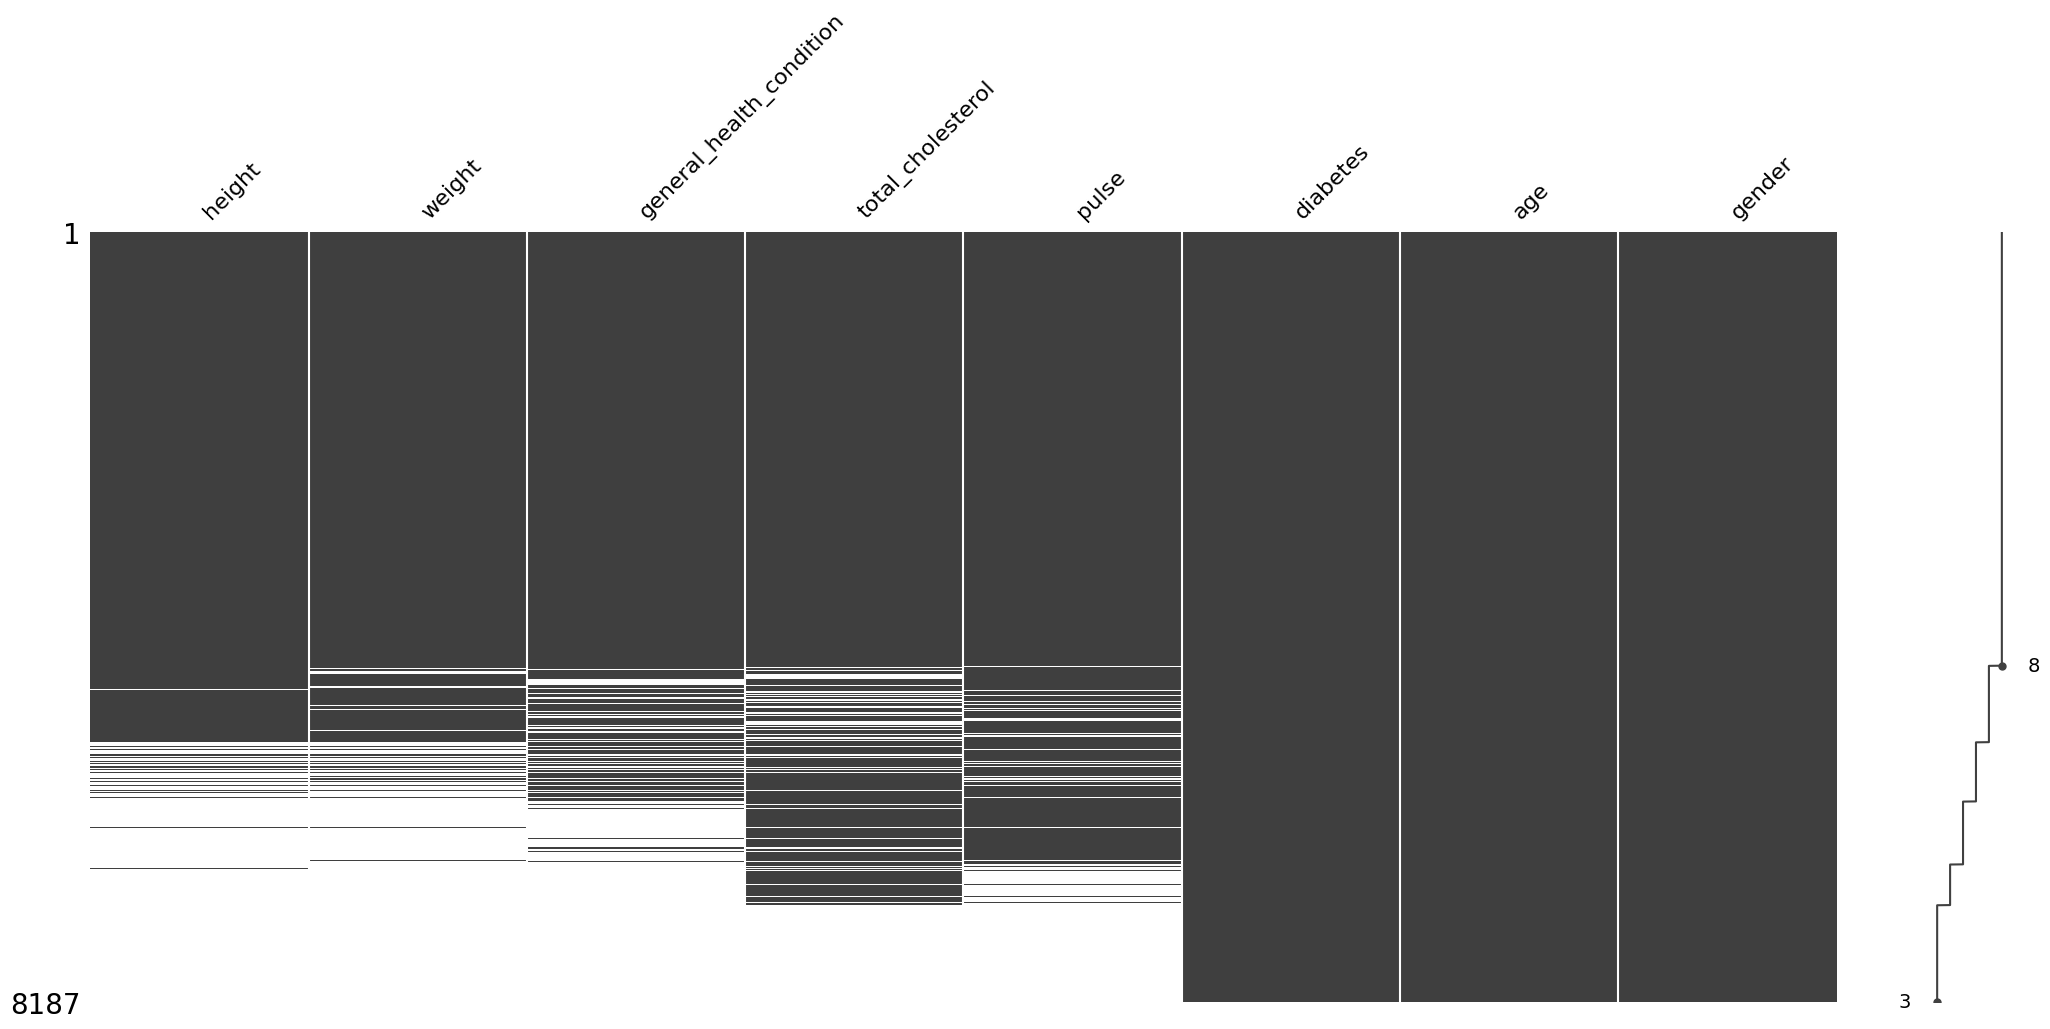

In [17]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .pipe(missingno.matrix, sort="descending")
)

c:\Users\Pc\anaconda3\envs\MDImputacion\lib\site-packages\upsetplot\plotting.py:795: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  styles["linewidth"].fillna(1, inplace=True)
c:\Users\Pc\anaconda3\envs\MDImputacion\lib\site-packages\upsetplot\plotting.py:796: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

{'matrix': <Axes: >,
 'shading': <Axes: >,
 'totals': <Axes: >,
 'intersections': <Axes: ylabel='Intersection size'>}

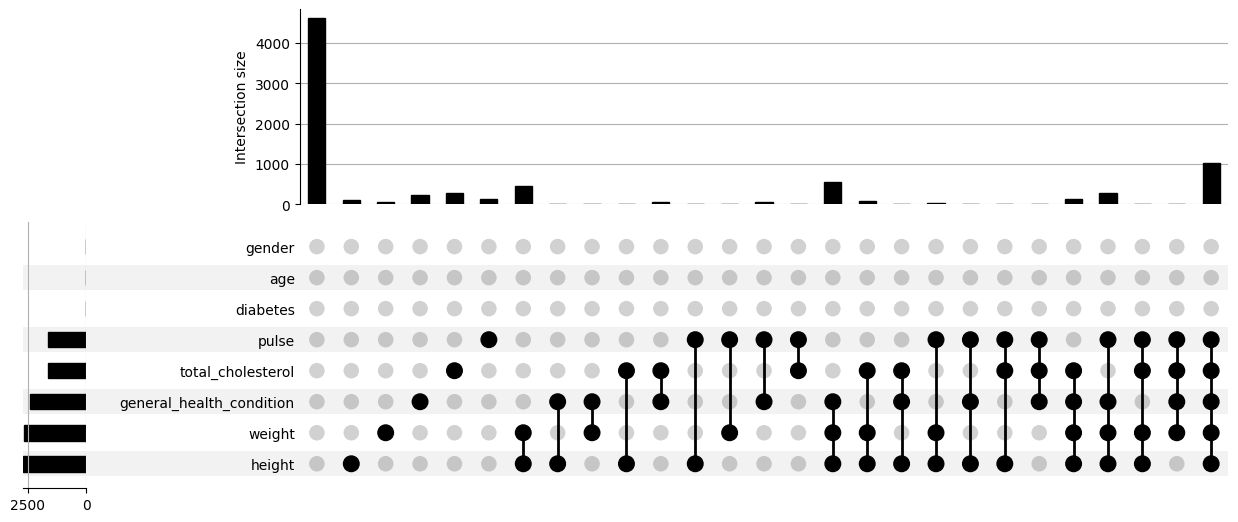

In [18]:
(
    nhanes_df
    .missing.sort_variables_by_missingness()
    .missing.missing_upsetplot()
)

<Axes: >

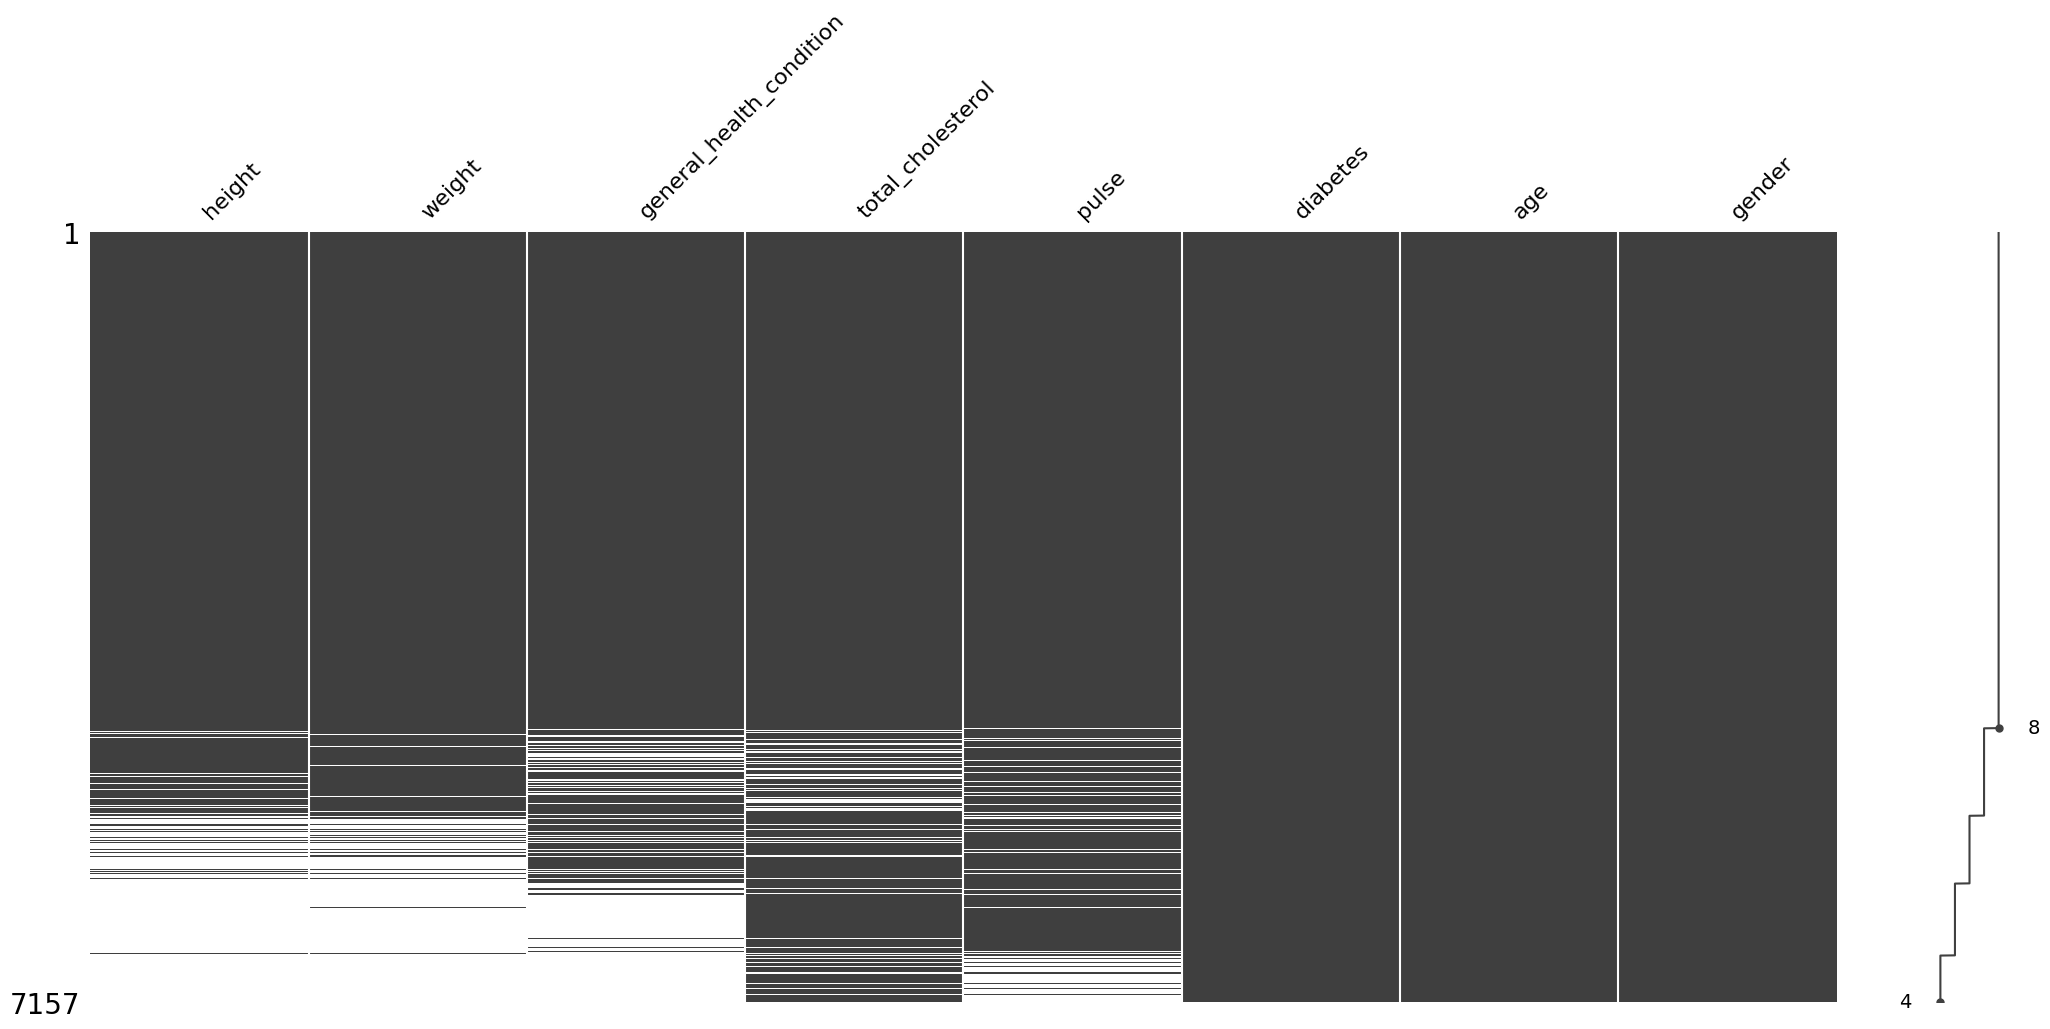

In [19]:
(
    nhanes_df
    .dropna(
        subset = ["pulse", "total_cholesterol", "general_health_condition", "weight", "height"],
        how = "all"
    )
    .missing.sort_variables_by_missingness()
    .pipe(lambda df: missingno.matrix(df, sort="descending"))
)

Eliminando datos faltantes

In [20]:
nhanes_df = (
    nhanes_df
    .dropna(
        subset = ["pulse", "total_cholesterol", "general_health_condition", "weight", "height"],
        how = "all"
    )
)

nhanes_df.shape

(7157, 8)